In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
data= pd.read_csv('C:/Users/Arcry/SkillBox/ML_HSE/files/data-logistic.csv', header=None)

In [4]:
data.head()

,0,1,2
0,-1,-0.663827,-0.138526
1,1,1.994596,2.468025
2,-1,-1.247395,0.749425
3,1,2.309374,1.899836
4,1,0.849143,2.407750


In [5]:
X = data.iloc[:, 1:]
y = data.iloc[:, 0]

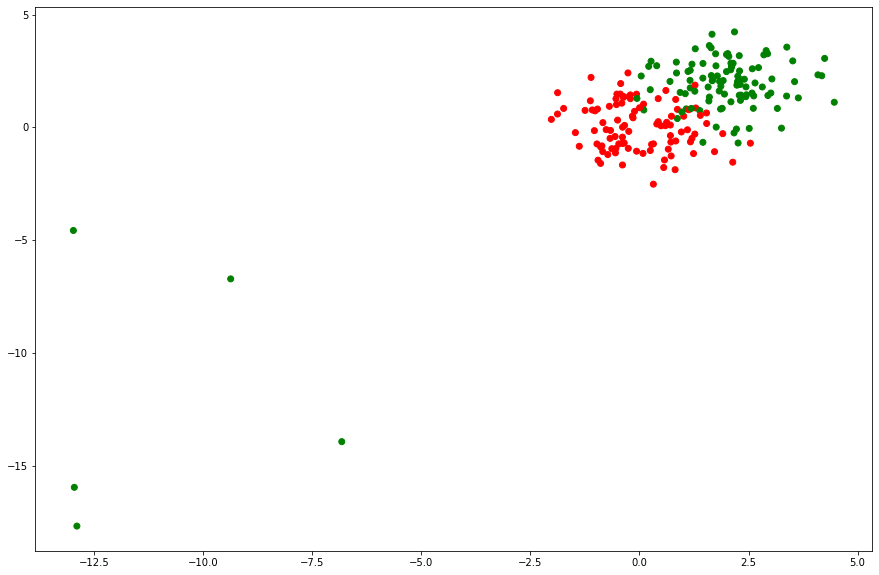

In [14]:
colors = ("red", "green")
colored_y = np.zeros(y.size, dtype=str)

for i, cl in enumerate([-1,1]):
    colored_y[y.ravel() == cl] = str(colors[i])
    
plt.figure(figsize=(15,10))
plt.scatter(X.iloc[:,0], X.iloc[:, 1], c=colored_y)
plt.show()

In [321]:
def logit(x, w):
    return np.dot(x, w)

def sigmoid(h):
    return 1. / (1 + np.exp(-h))

class MyRidgeRegression(object):
    def __init__(self, w):
        self.w = np.array(w)
    
    def fit(self, X, y, max_iter=10000, C=10, lr=0.1, eps=1e-5):
        for i in range(max_iter):
            z = sigmoid(y * logit(X, self.w))
            grad = np.mean((X.T * y) * (1 - z), axis=1)
            w_new = self.w + lr * grad - lr * C * self.w
            if np.sqrt(np.sum(np.square(w_new-self.w))) < eps:
                print(i)
                break
            self.w = w_new
        return self
        
    def predict(self, X):
        return sigmoid(logit(X, self.w))
        

In [327]:
clfr = MyRidgeRegression(w=[0.0, 0.0])
clfr.fit(X, y, 100000, 0)

243


In [324]:
from sklearn.metrics import roc_auc_score

In [328]:
roc_auc_score(y, clfr.predict(X))

0.9268571428571428

In [326]:
clfr = MyRidgeRegression(w=[0.0, 0.0])
clfr.fit(X, y, 100000, 10)
roc_auc_score(y, clfr.predict(X))

7


0.9362857142857142